# SLT-CE-6: Pairwise Clustering

In [ ]:
## grade = 4

<h2 style="background-color:#f0b375;"> References </h2>

<ol>
<li> Pairwise Data Clustering by Deterministic Annealing <br>
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.8.9812&rep=rep1&type=pdf
</li>
</ol>

<h2 style="background-color:#f0b375;"> Setup </h2>

In [6]:
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from sklearn.utils.validation import check_is_fitted
from sklearn.cluster import SpectralClustering
from scipy.io import loadmat
from sklearn.cluster import KMeans


<h2 style="background-color:#f0b375;"> Data </h2>

## ProDom Data
http://prtools.org/disdatasets/index.html#ProDom

In [7]:
prodom = {"input": loadmat("prodom.mat")}
# After some reverse-engineering:
prodom["similarity"] = np.array(prodom["input"]["s"])[0,0][0]
prodom["labels"] =np.array(prodom["input"]["s"])[0,0][2].flatten()

## Protein Data

http://prtools.org/disdatasets/index.html#Protein

In [8]:
protein = {"input": loadmat("protein.mat")}
protein["dissimilarity"] = np.array(protein["input"]["d"])[0,0][0]
protein["labels"] =np.array(protein["input"]["d"])[0,0][2].flatten()

In [37]:
def plt_pairwise(data, labels, cmap="binary", alpha=0.33):
    """Plot (dis-)similarity data
    
    Args:
        data (np.ndarray): Symmetric (dis-)similarity array (n_samples, n_samples)
        labels (np.array): Cluster label array  (n_samples,)
        cmap (str): Color Map for (dis-)similarity values
        alpha (float): Opacity of cluster overlay, between 0 and 1
        
    Shows:
        Image plot of (dis-)similarity matrix, overlaid with transparent blocks,
        which indicate the clusters contained in labels.
        Note: Permute the data according to the sorting of the labels.
        
    Prints:
        Minimum, Maximum and Median of (dis-)similarity values
        Warning, if (dis-)similarity matrix is not symmetric
    """
    labels = labels
    data = data
    #sorting
    print(labels)
    indexsort2 = np.argsort(labels)
    D = data  
    print(indexsort2)
    
    Dsort = D[(indexsort2), :]
    Dsort1 = np.matrix(Dsort)

    print(np.min(D))
    print(np.max(D))
    print(np.median(D))

    plt.imshow(Dsort, cmap='binary', alpha=0.33)
    plt.title('Dt sorted')
    plt.show()
    


[1 1 1 ... 1 3 4]
[   0 1011 1010 ... 1361 1381 2603]
-15529
478835
-8847.0


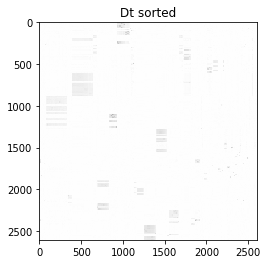

In [38]:
plt_pairwise(prodom["similarity"], prodom["labels"])

data.min = -15529
data.median = -8847.0
data.max = 478835


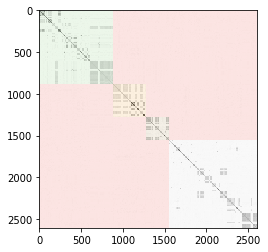

In [32]:
# This is how the output should look like
plt_pairwise(prodom["similarity"], prodom["labels"])

<p style="background-color:#adebad;">
    Demonstrate your implementation of <b> plt_pairwise </b> below.
</p>

In [ ]:
plt_pairwise(protein["dissimilarity"], protein["labels"], cmap="gray")

<p style="background-color:#adebad;">
    Read reference [1] and recapitulate their Algorithm II and III. <br>
    Make sure that every variable is properly defined in your recap.
</p>

Put your recap here

<p style="background-color:#adebad;">
    Implement the <b>fit_predict </b> method without embedding for the template class PairwiseClustering, according to its docstring. <br>
    You can add more class methods if necessary.
</p>

In [366]:
class PairwiseClustering(skl.base.BaseEstimator, skl.base.TransformerMixin):
    """Template class for PairwiseClustering (PC)
    
    Attributes:
        M (np.ndarray): Assignment probability matrix (n_samples, n_clusters)
        centroids (np.ndarray): Embedding centroids (n_clusters, n_components), used only if embed is True.
        embeddings (np.ndarray): Embeddings of input samples (n_samples, n_components),
                                 used only if embed is True.
    Parameters:
        n_clusters (int): Maximum number of clusters.
        random_state (int): Random seed.
        embed (bool): Indicator, if data should be clustered and embedded simultaneously (algorithm III),
                      or not (algorithm II).
        n_components (int): Dimension of embedding space, used only if embed is True
    """
    
    def __init__(self, n_clusters=4, random_state=42, embed=False, n_components=2):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.embed = embed
        self.n_components = n_components
        # Add more parameters, if necessary.
    
    def fit_predict(self, X):
        """Compute PC for dissimilarity matrix X
        
        Compute cluster assignments. If embed is True, also compute embeddings/centroids.
         
        Args:
            X (np.ndarray): Dissimilarity matrix (n_samples, n_samples)
        
        Returns:
            C (np.ndarray): Assignments (n_samples,) 
        """
       
        kk = np.shape(X)
        nsamples = kk[0]
        T0 = 10
        nabla = 0.5

        M0 = np.zeros((nsamples, self.n_clusters))
        M = np.zeros((nsamples, self.n_clusters))
        centroids =  np.zeros((nsamples, self.n_components))

        def get_random_index(upper_bound=None):
            return np.random.randint(0, random_state)


        epsilon0 = np.ones((nsamples, self.n_clusters)) * get_random_index()
        epsilon = np.zeros((nsamples, self.n_components))



        T0 = 10
        Tfinal = 0.5
        t = 0
        #Matrix i rows, k colums=centroids
        D = np.matrix(X)
        #Matrix i rows, k clusters
        epsilon2 = 0.1
        N = nsamples
        
        if self.embed:
          
            # Code for algorithm III
              while T0 > Tfinal:
                nabla = 0.1
                T0 = T0 - Tfinal*nabla
                t = t + 1

                for v in range(n_clusters):
                    for i in range(nsamples):
                    sumdem = np.sum(np.exp(- epsilon0[i] / T0))
                    M[i][v] = (np.exp(-epsilon0[i][v] / T0)) / sumdem

                for v1 in range(n_clusters):
                    for i1 in range(nsamples):
                    pv = np.sum(M[:,v1]) / N
                    term33 = np.sum(M[:,v1] * D[:,v1])
                    term2 = np.sum(M[:,v1]* (D[:,v1] - (1 / 2*pv*N) * term33))
                    epsilon[i1][v1] = (1 / (pv * N)) * term2
                    print(epsilon)
  
            # preparing for next iteration  
                if abs(Mnext - M0) < epsilon2 :
                     epsilon0 = epsilon0
                else:
                     epsilon0 = epsilon0 
            
                C = epsilon
            
        else:
      
            # Code for algorithm II
            #Algorithm 2
          
            while T0 > Tfinal:
                nabla = 0.1
                T0 = T0 - Tfinal*nabla
                t = t + 1

                for v in range(n_clusters):
                    for i in range(nsamples):
                    sumdem = np.sum(np.exp(- epsilon0[i] / T0))
                    M[i][v] = (np.exp(-epsilon0[i][v] / T0)) / sumdem

                for v1 in range(n_clusters):
                    for i1 in range(nsamples):
                    pv = np.sum(M[:,v1]) / N
                    term33 = np.sum(M[:,v1] * D[:,v1])
                    term2 = np.sum(M[:,v1]* (D[:,v1] - (1 / 2*pv*N) * term33))
                    epsilon[i1][v1] = (1 / (pv * N)) * term2
                    print(epsilon)
  
            # preparing for next iteration  
                if abs(Mnext - M0) < epsilon2 :
                     epsilon0 = epsilon0
                else:
                     epsilon0 = epsilon0 
            
                C = epsilon
        
        return C
    
    def cost(self, D, M):
        """Compute the costs of the clustering solution M for dissimilarity D.
        
        The costs refer to the pairwise clustering costs in eq. (16) of reference [1].
        
        Args:
            D (np.ndarray): Dissimilarity matrix (n_samples, n_samples)
            M (np.ndarray): Assignment probability matrix (n_samples, n_clusters)
            
        Returns:
            cost (float): Costs of current clustering
        """
        
        raise NotImplementedError
        
        return cost

<p style="background-color:#adebad;">
    Create an instance of your PC class, then fit and predict the Protein data. <br>
    Repeat the same with sklearn.SpectralClustering. <br>
    Record the execution time.
</p>

In [76]:
%%time
PC = PairwiseClustering()
labels_pair = PC.fit_predict(protein["dissimilarity"])

NameError: name 'PairwiseClustering' is not defined

In [65]:
%%time
SC = skl.cluster.SpectralClustering(n_clusters=4, random_state=42, affinity="precomputed")
affinities = np.exp(- protein["dissimilarity"] / 3) # SC takes positive affinities as input
labels_spectral= SC.fit_predict(affinities)

CPU times: user 608 ms, sys: 46.4 ms, total: 654 ms
Wall time: 1.82 s


<h2 style="background-color:#f0b375;">
Section 4.5 
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 4.5 </span>
</h2>

<p style="background-color:#adebad;">
    Complete the function <b>compare_clusterings</b>, and use it to compare spectral clustering and pairwise clustering.
</p>

In [355]:
def compare_clusterings(labels_true, **labels_pred):
    """Show a summary of different clustering metrics
    
    Args:
        labels_true (array): Ground-truth cluster labels
    
    Note:
        Each kwarg should be an array with predicted labels
    """
    n_pred = len(labels_pred)
    
    scores = []
    for name in dir(skl.metrics.cluster):
        score = getattr(skl.metrics.cluster, name)
        try:
            score(labels_true=[0], labels_pred=[0]) # Check if score takes the right arguments
            if "score" not in score.__name__:
                raise TypeError
            if score.__name__ == "mutual_info_score": # Exclude, not normalized to 1.0
                raise TypeError
        except TypeError:
            continue
        else:
            scores.append(score)
    
    for key, val in labels_pred.items():
        raise NotImplementedError
        # Use plt.barh to plot the scores.

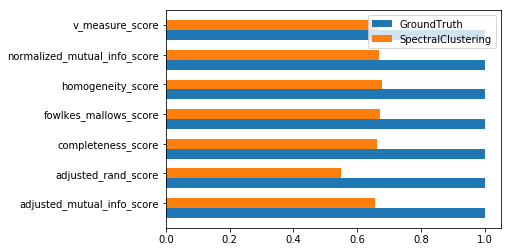

In [359]:
# Example of how the output should look like
compare_clusterings(labels_true=protein["labels"],
                    SpectralClustering=labels_spectral,
                    GroundTruth=protein["labels"])

<p style="background-color:#adebad;">
    Demonstrate your implementation of compare_clusterings below
</p>

In [ ]:
compare_clusterings(labels_true=protein["labels"],
                    SpectralClustering=labels_spectral,
                    PairwiseClustering=labels_pair)

<h2 style="background-color:#f0b375;">
Section 5.0 
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 5.0 </span>
</h2>

<p style="background-color:#adebad;">
    As PairwiseClustering takes dissimilarities as input, we need to transform the similarity data from Prodom accordingly.<br>
    Run fit_predict with all the transforms/params below, and run one compare_clusterings for each set of parameters.<br>
    Finally, produce a separate compare_clusterings with the best parameter from each transform.
</p>

In [ ]:
# D = ((max(S) - S) / (max(S) - min(S))) ** a
# a = [1, 2, exp]

In [ ]:
# D = (max(S) / (1 + S - min(S))) ** a
# a = [1, 1/2, log]

<p style="background-color:#adebad;">
    Implement one more reasonable transform from similarity to dissimilarity, and compare it to the other settings.
</p>

<h2 style="background-color:#f0b375;">
Section 5.5 
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 5.5 </span>
</h2>

<ul style="background-color:#adebad;">
    <li>
        Complete the cost function of the PairwiseClustering class
    </li>
</ul>

<ul style="background-color:#adebad;">
    <li>
        Re-run fit_predict with different random seeds and plot the distribution of clustering costs as shown in figure 1 of reference [1]. <br> Perform the experiment for all the settings listed below, and visualize the results properly.
    </li>
</ul>

In [ ]:
# data = [protein, prodom]
# Use the best transform from Problem 3 to transform similarities
# other parameters are default
PC = PairwiseClustering(random_state=...)

In [ ]:
# n_clusters = [2, 4, 6, 8]
# data = protein
# other parameters are default
PC = PairwiseClustering(random_state=...)

<h2 style="background-color:#f0b375;">
Section 6.0
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 6.0 </span>
</h2>

<ul style="background-color:#adebad;">
        <li>
            Write a function to generate a Gaussian distributed random dissimilarity matrix 
        </li>
</ul>

<ul style="background-color:#adebad;">
        <li>
            Implement the refined meanfield approach (TAP method, Section 4.2 in reference [1]) using cavity fields
        </li>
</ul>

<ul style="background-color:#adebad;">
        <li>
            Repeat the Monte Carlo experiments in Section 4.2 and estimate the residual errors for N = {100,200,500,1000,2000}. 
            You may use the MCMC implementation of your choice.
        </li>
</ul>

<h2 style="background-color:#f0b375;">
Section Optional
<span style=font-size:50%> Complete this section to obtain a bonus .5 grade (in case you skipped a section) </span>
</h2>

<ul style="background-color:#adebad;">
        <li>
            Implement the embed == True part of <b>PC.fit_predict</b> (algorithm III).
        </li>
    </ul>

In [ ]:
PCE = PairwiseClustering(embed=True)
PCE.fit_predict(protein["dissimilarity"])

<ul style="background-color:#adebad;">
        <li>
        Cluster the protein data, and properly visualize the the embedding for n_components=2.
        </li>
    </ul>

In [ ]:
# Visualize PCE.embeddings, including PCE.centroids

## Comments

We hope you found this exercise instructive.

Feel free to leave comments below, we will read them carefully.